## Boston Housing Project - Coursera

####  - By Shreya Bhatnagar

In [503]:
#!pip install seaborn
#importing libraries

import sklearn
import pandas as pd
import matplotlib.pyplot as mpt
import numpy as np
import seaborn as sns
import scipy.stats
import statsmodels.api as sm

In [504]:
#making a dataframe from the data
dt=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')
#showing the data
dt

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [505]:
#checking the data shape
print(dt.shape)
#type(dt)

(506, 14)


In [506]:
#Setting the first column as index

dt.set_index('Unnamed: 0', inplace=True)
#dt.reset_index(inplace=True)
dt

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
Unnamed: 0,,,,,,,,,,,,,
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9


## 1. Providing boxplot for "Median value of owner-occupied homes"

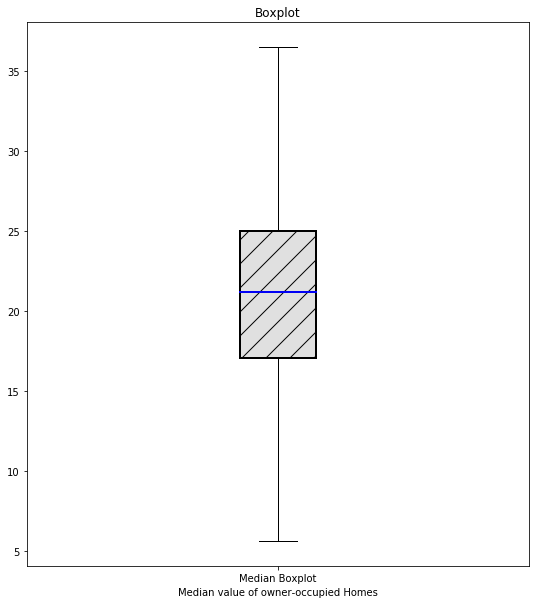

In [507]:
medv=list(dt.MEDV) #make a list of median values
mpt.figure(figsize =(9, 10)) #give plot size
mpt.title('Boxplot') #title of plot
mpt.xlabel('Median value of owner-occupied Homes') # x-label

"""
Plotting the boxplot.
Here, medv are the data points, labels are the x label of box-plot, medianprops 
gives properties of median line, patch_artist allows us to make the color and size
changes in the boxplot. showfliers is set to false to not show the outlier values.

"""

bp=mpt.boxplot(medv, labels=['Median Boxplot'], medianprops={'linewidth': 2, 'color':'#0000f4'}, 
               patch_artist=True, showfliers=False)

#Setting the boxplot attributes

for box in bp['boxes']:
    box.set(color='#000000', linewidth = 2)
    box.set(facecolor = '#e0e0e0' )
    box.set(hatch = '/')

## 2. Providing histogram for Charles River Variable

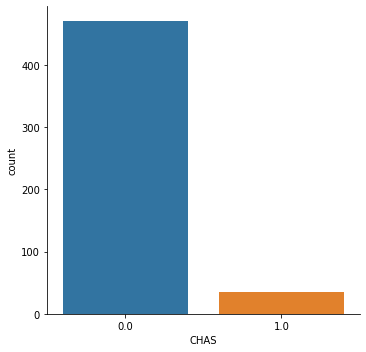

In [508]:

"""
#By matplotlib, we get the plot in the following way, which is not good.

mpt.figure(figsize=(7,5)) # providing figure size
mpt.xticks(range(2)) # reducing the x axis values
mpt.hist(dt.CHAS,align='right') # plotting histogram
mpt.show() # showing the plot
"""

#Using seaborn library
sns.catplot(x='CHAS', kind='count',data=dt)

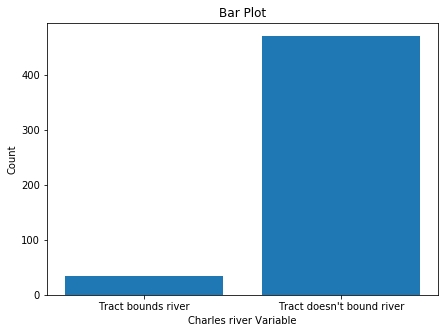

In [509]:
"""
Using matplotlib, A better way to show the Charles river Variable will be a Bar Plot.
It is shown as follows
"""
mpt.figure(figsize=(7,5))
mpt.xlabel('Charles river Variable')
mpt.ylabel('Count')
mpt.title('Bar Plot')
true_false_values=[sum(dt.CHAS==1),sum(dt.CHAS==0)]
mpt.bar(['Tract bounds river','Tract doesn\'t bound river'],true_false_values)
mpt.show()

## 3. Providing a boxplot for the MEDV variable vs the AGE variable. 

In [510]:
# Dividing median according to age

age1=dt.loc[dt['AGE']<=35]['MEDV'] 
age2=dt.loc[(dt['AGE']>35) & (dt['AGE']<=75)]['MEDV'] 
age3=dt.loc[dt['AGE']>75]['MEDV']

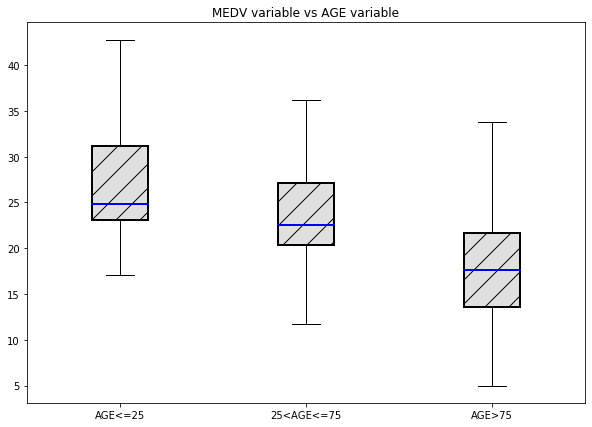

In [511]:
# Plotting boxplot
mpt.figure(figsize=(10,7)) # Figure size
mpt.title('MEDV variable vs AGE variable')

"""
We pass age series in boxplot, it creates three boxplots according to the age division created by us.
Labels are used to label the x-axis values of boxplot.
median line properties is set by medianprops.

"""
bp2=mpt.boxplot([age1,age2,age3], labels=['AGE<=25','25<AGE<=75','AGE>75'], 
                medianprops={'linewidth':2, 'color':'#0000f4'},patch_artist=True, showfliers=False)

for box in bp2['boxes']:
    box.set(color='#000000', linewidth = 2)
    box.set(facecolor = '#e0e0e0')
    box.set(hatch='/')
#mpt.grid(True) #Can set grid if required
mpt.show()

## 4. Providing a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.

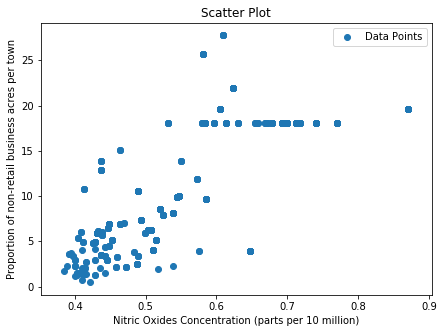

In [512]:
#Providing the Scatter Plot

mpt.figure(figsize=(7,5))
mpt.scatter(dt['NOX'],dt['INDUS'],label='Data Points') # setting x and y axis data
mpt.xlabel('Nitric Oxides Concentration (parts per 10 million)') # X-Label
mpt.ylabel('Proportion of non-retail business acres per town') # Y-Label
mpt.title('Scatter Plot') # Title
mpt.legend() #Showing the Legend
mpt.show()

#### What can you say about the relationship?
##### Ans -  It is clear that higher proportion of non-retail business acres tend to have higher concentrations of nitric oxides.

## 5. Creating a histogram for the pupil to teacher ratio variable.

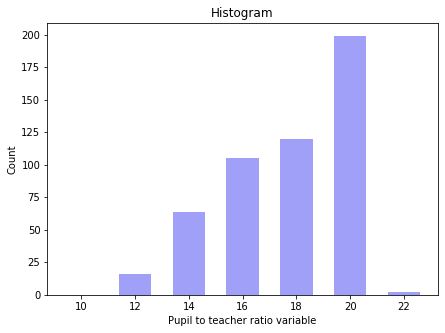

In [513]:
# Creating Bins
bins=[x for x in range(10,25,2)]

#Plotting Histogram
mpt.figure(figsize=(7,5))
mpt.title('Histogram')
mpt.xlabel('Pupil to teacher ratio variable')
mpt.ylabel('Count')
mpt.hist(dt.PTRATIO,bins, rwidth=0.6, align='left', color='#a0a0f9')
mpt.show()

# Hypothesis Testing 

### Question 1 - Is there a significant difference in median value of houses bounded by the Charles river or not?

We take our hypothesis as follows <br>

$H_{0}$ = There is no significant difference in median value of houses bounded by the charles river.<br>
$H_{a}$ = There is a significant difference in median value of houses bounded by the charles river.<br>

In [514]:
# t-test

scipy.stats.ttest_ind(dt[dt['CHAS']==0]['MEDV'],dt[dt['CHAS']==1]['MEDV'])

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

#### T-test value is 0.0000739 which is less than alpha value of 0.05, hence we reject the null hypothesis and state that there is a significant difference in median value of houses bounded by the Charles River.

### Question 2 - Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? 

We take our hypothesis as follows <br>

$H_{0}$ = There is no significant difference in median value of houses for each proportion of owner occupied units built prior to 1940<br>
$H_{a}$ = There is a significant difference in at least one of the median value of houses for each proportion of owner occupied units built prior to 1940<br>

We take the AGE variable division as follows:<br>
**'AGE<=25' ,**
**'25<AGE<=75' ,**
**'AGE>75'**

In [515]:
# Dividing median according to age

age1=dt.loc[dt['AGE']<=35]['MEDV'] 
age2=dt.loc[(dt['AGE']>35) & (dt['AGE']<=75)]['MEDV'] 
age3=dt.loc[dt['AGE']>75]['MEDV']

In [516]:
# ANOVA Test
f_stat,p_val = scipy.stats.f_oneway(age1,age2,age3)
print(f'The F_Statistics is {f_stat} and the p_value is {p_val}')

The F_Statistics is 40.06431640638432 and the p_value is 7.155006254871619e-17


##### The F - Statistics is 40.06431640638432 and the p - value is 7.155006254871619e-17 and as the p value is less than our alpha of 0.5, we reject the null hypothesis and state that there is a significant difference in at least one of the median value of houses for each proportion of owner occupied units built prior to 1940.

### Question 3 - Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

We take our hypothesis as follows <br>

$H_{0}$ = There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.<br>
$H_{a}$ = There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.<br>

In [517]:
r_val, p_val_3 = scipy.stats.pearsonr(dt['NOX'],dt['INDUS'])
print(f'The Pearson correlation coefficient is {r_val} and the p-value is {p_val_3}')

The Pearson correlation coefficient is 0.763651446920915 and the p-value is 7.913361061239593e-98


##### The Pearson correlation coefficient is 0.763651446920915 and the p-value is 7.913361061239593e-98 which is less than 0.05, hence we reject the null hypothesis and state that there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

### Question 4 - What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes?

We take our hypothesis as follows <br>

$H_{0}$ = There is an impact of weighted distance to the five Boston employment centres on the median value of owner occupied homes.<br>
$H_{a}$ = There is no impact of weighted distance to the five Boston employment centres on the median value of owner occupied homes.<br>

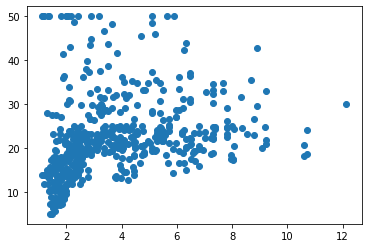

In [518]:
#Scatter plot between DIS and MEDV

mpt.scatter(dt['DIS'],dt['MEDV'])

In [519]:
## X is the input variables (or independent variables)
X = dt['DIS']
## y is the target/dependent variable
y = dt['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 21 Jan 2021   Prob (F-statistic):           1.21e-08
Time:                        22:24:17   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### p-value is less than 0.05, hence we reject the null hypothesis, so there is correlation between DIS and MEDV variables. Hence we can conclude that an additional weighted distance to the five Boston employment centres will have an impact on the median value of owner occupied homes. 
<br>
We have an F-statistic of 33.58 hence there will be a significant change in the median value of owner occupied homes if we include an additional weighted distance to the five boston employment centers.

## END OF FILE

# THANKYOU